In [11]:
%%latex
\begin{equation}
P(A|X)=\frac{ P(X|A) P(A) }{ P(X)}
\end{equation}

<IPython.core.display.Latex object>

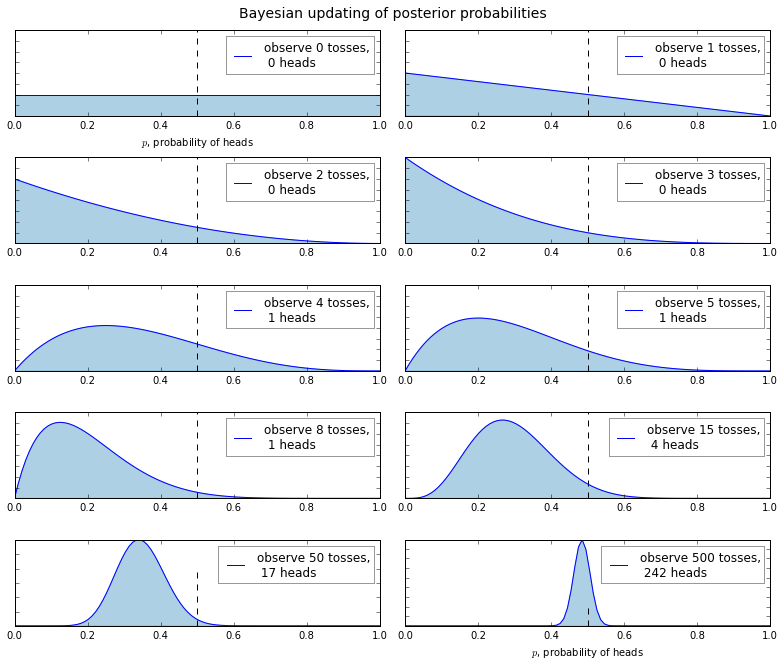

In [29]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
#bernoulli distribution = two point distribution,rvs = Random variates.
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    #Probability density function
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

# 概率计算
* A 是程序没bug的概率
* X 是所有测试没发现问题的概率
* P(A|X) 程序通过了测试的前提下，没有bug的概率
* P(X|A) 程序没bug的前提下，通过测试的概率，这个应该是1
* P(X)的计算可以做如下分解 

    P(X) = P(X and A) + P(X and ~A)
         = P(X|A)P(A) + P(X|~A)P(~A)
         = p(X|A)p + P(X|~A)(1-p)
       
    我们可以先假设程序有bug但是依然能通过测试的概率为0.5：P(X|~A) = 0.5 
    P(A|X) = 2p/(1+p)

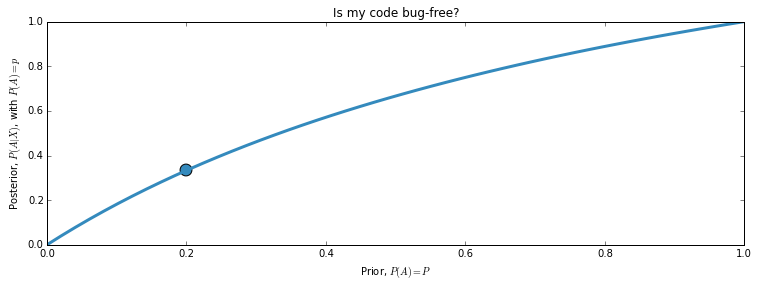

In [40]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2 * p/(1 + p), color='#348ABD', lw=3)
plt.scatter(0.2, 2 * (0.2) / 1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = P$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Is my code bug-free?")